In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics
import sklearn.neighbors

print("Loading 20 newsgroups dataset for categories:")
data_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
data_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)
print('data loaded')

'''Create tf-idf vectors for the input'''
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.9,
                                 stop_words='english')
X_train = vectorizer.fit_transform(data_train.data)
X_test = vectorizer.transform(data_test.data)
y_train = data_train.target
y_test = data_test.target


Loading 20 newsgroups dataset for categories:
data loaded
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.66      0.83      0.73       319
           comp.graphics       0.42      0.68      0.52       389
 comp.os.ms-windows.misc       0.44      0.60      0.51       394
comp.sys.ibm.pc.hardware       0.46      0.61      0.53       392
   comp.sys.mac.hardware       0.49      0.59      0.54       385
          comp.windows.x       0.60      0.56      0.58       395
            misc.forsale       0.51      0.51      0.51       390
               rec.autos       0.72      0.68      0.70       396
         rec.motorcycles       0.83      0.83      0.83       398
      rec.sport.baseball       0.72      0.76      0.74       397
        rec.sport.hockey       0.82      0.79      0.81       399
               sci.crypt       0.79      0.81      0.80       396
         sci.electronics       0.69      0.50      0.58     

In [6]:
weights = 'uniform'
neighbors = []
scores = []
for n_neighbors in range(2, 50):
    '''Train a K-Neighbors Classifier on the data'''
    clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, y_train)

    '''Make predictions on the test data using the trained classifier'''
    y_predicted = clf.predict(X_test)
    f1_score = sklearn.metrics.f1_score(y_test, y_predicted, average='weighted')
    
    '''add for plot'''
    neighbors.append(n_neighbors)
    scores.append(f1_score)



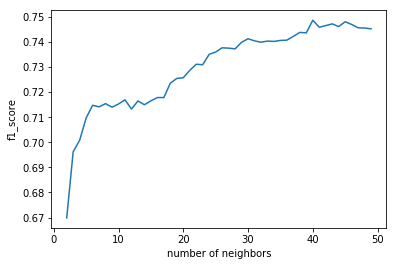

In [7]:
'''plot'''
import matplotlib.pyplot as plt
plt.plot(neighbors,scores)
plt.xlabel('number of neighbors')
plt.ylabel('f1_score')
plt.show()